# Real estate price predictor


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing data.csv")

In [3]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [4]:
 housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Train-Test_Splitting

In [7]:
#for learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffle = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffle[:test_set_size]
    train_indices = shuffle[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = split_train_test(housing, 0.2)

In [9]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



In [10]:
from sklearn.model_selection import train_test_split 
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
#It is a part of scikit learn library
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
housing = strat_train_set.copy()

# looking for Correlations

In [15]:
corr_matrix = housing.corr()
# part of PANDAS dataframe used for correlating elements among columns 


In [16]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

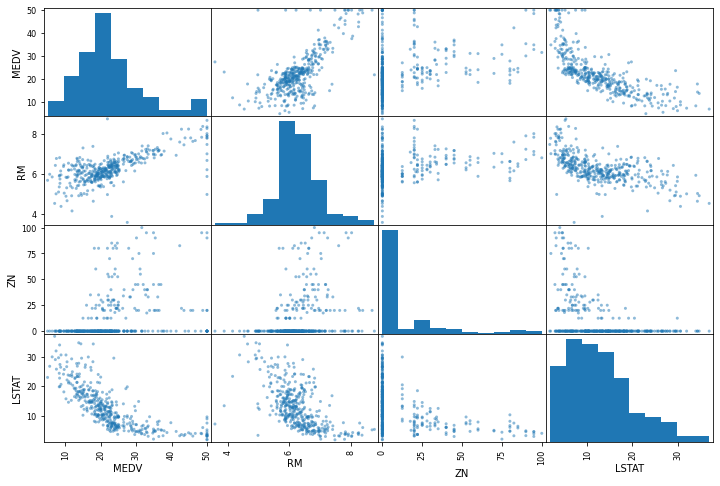

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT" ]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

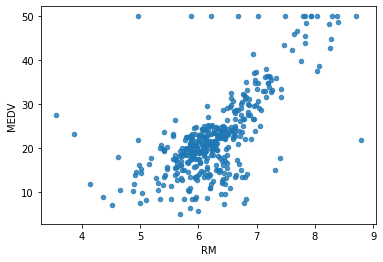

In [18]:
housing.plot(kind = "scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out attribute combinations

In [19]:
housing["TAXRM"]= housing['TAX']/housing['RM']

In [20]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   

     PTRATIO       B  LSTAT  MEDV       TAXRM  
254     16.4  392.89   6.57  21.9   51.571709  
348     17.0  390.94   5.99  24.5   42.200452  
476     20.2  396.21  18.68  16.7  102.714374  
321     19.6  396.90   6.87  23.1   45.012547  
326     19.6  396.90   6.15  23.0   45.468948

In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

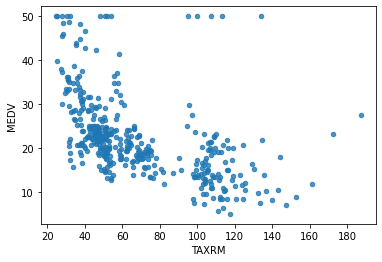

In [22]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV",alpha=0.8)

In [23]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [26]:
X = imputer.transform(housing)

In [27]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [28]:
housing_tr.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.602814   10.836634   11.344950    0.069307    0.558064    6.279908   
std      8.099383   22.150636    6.877817    0.254290    0.116875    0.712983   
min      0.006320    0.000000    0.740000    0.000000    0.389000    3.561000   
25%      0.086962    0.000000    5.190000    0.000000    0.453000    5.878750   
50%      0.286735    0.000000    9.900000    0.000000    0.538000    6.210000   
75%      3.731923   12.500000   18.100000    0.000000    0.631000    6.630250   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.039851    3.746210    9.735149  412.341584   18.473267  353.392822   
std     28.258248    2.099057    8.731259  168.672623    2.129243   96.069235   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     44.850000    2.035975    4.000000  284.000000   17.400000  374.617500   
50%     78.200000    3.122200    5.000000  337.000000   19.000000  390.955000   
75%     94.100000    5.100400   24.000000  666.000000   20.200000  395.630000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.791609  
std      7.235740  
min      1.730000  
25%      6.847500  
50%     11.570000  
75%     17.102500  
max     36.980000

## Sci-kit-learn design 

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## feature scaling

Primarily, two types of feature scaling methods
1. Min-max scaling (Normalization)
   (value-min)/(max-min)
   Sklearn provides a class called MinMaxScaler for this
   
2. Standardization
    (value - mean)/STD
    Sklearn provides a class called StandardScaler for this

## Creating pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [30]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [31]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model 

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [33]:
some_data= housing.iloc[:5]

In [34]:
some_labels = housing_labels.iloc[:5]

In [35]:
prepared_data = my_pipeline.transform(some_data)

In [36]:
model.predict(prepared_data)

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [37]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [38]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [39]:
lin_mse

23.322346079233675

In [40]:
lin_rmse

4.829321492635759

## Saving the model

In [41]:
from joblib import dump, load
dump(model, 'Final.joblib')

['Final.joblib']

## Testing the model on test data

In [42]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[22.69663678 17.22600313 30.02303718 30.72767895  8.8510416  13.31467014
 17.29615732 17.74740541 32.49300647 36.05576682 16.37971118  0.55763712
 22.98231849 20.44805414 20.04676103 12.94089562 31.14959131 13.42383778
 25.02732037 24.1680579  20.41663802 17.05356046 17.82193794 25.60370774
 19.51063444 32.83523603 19.43372437 33.72021979  8.02922445 34.67322625
 19.51326153 21.4383898  29.31429776 16.35664997 26.98334343 18.35632929
 37.3141123  24.56541978 22.2186496  37.13515388 25.15918226 34.48919537
 23.4490451  24.01052594 18.52058894 32.69367712 38.47436972 21.39603535
 17.65060105 16.24434034 21.24195102 12.40190011 19.88486433 20.40554849
 27.94261106 33.08938174 40.13445849 31.36345155 14.94004062 19.73822665
 40.48290495 18.11543107 15.13757279 27.66353013 19.49519021 32.50860212
 23.40912101 20.30670328 21.16556351 33.78834117 34.10260096 27.63685041
 24.51460463 21.88751595 36.17309546  8.58176976 17.42620124 21.46806914
 20.54643262 23.00127296 25.98733788 22.55143049 14

## Root Mean Square Error

In [43]:
final_rmse

4.143819554319327

## R^2 value

In [44]:
import sklearn.metrics as metrics
r2 = metrics.r2_score(Y_test, final_predictions)

In [45]:
r2

0.7572684891063761

## Coefficients of linear regression

In [46]:
print("Weights is ", model.coef_)
print("intercept is ", model.intercept_)

Weights is  [-0.53859116  0.82011884  0.24916678  0.84013464 -2.15381579  2.69919117
  0.24483568 -2.91024203  2.42317778 -1.84376829 -2.12904379  1.02858558
 -4.08798371]
intercept is  22.509405940594053


## Accuracy

In [47]:

accuracy = model.score(X_test_prepared, Y_test)
print(accuracy*100)


75.72684891063761


## Adjusted R^2

In [48]:
adj_r2 = 1 - ((1 - r2) * (506 - 1)) / (506 - 14 - 1)


In [49]:
adj_r2

0.7503474276959673

## Testing on input

In [50]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [51]:
from joblib import dump, load
import numpy as np
model = load('Final.joblib') 
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([23.94996896])